In [134]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from itertools import chain

In [135]:
account = #FILL IN

# Read in data

In [136]:
#pathlist = Path('Data/').glob('**/*.csv')
pathlist = Path('C:/Users/'+account+'/UCB/iPVU Web Scraping and trends - General/leonel_scrapped_data/prm/').glob('**/*.csv')
for path in pathlist:
    path_in_str = str(path)
    data = pd.read_csv(path_in_str)
    display(data.head())

,ID,DOI,Type,PublishedDate,Source,title_words,abstract_sentences,abstract_words
0,DOI:10.1016/j.ando.2020.04.005,10.1016/j.ando.2020.04.005,Annales d'Endocrinologie,2020-04-21 00:00:00+00:00,ELSEVIER,"['renin-angiotensin-aldosterone', 'system', 'covid-19', 'infection']","['Abstract With multiplication COVID-19 severe acute respiratory syndrome case due SARS COV2 , c...","['abstract', 'with', 'multiplication', 'covid-19', 'severe', 'acute', 'respiratory', 'syndrome',..."
1,DOI:10.1016/j.jamda.2020.04.017,10.1016/j.jamda.2020.04.017,Journal of the American Medical Directors Association,2020-04-23 00:00:00+00:00,ELSEVIER,"['the', 'geriatrician', 'the', 'frontline', 'specialist', 'in', 'the', 'treatment', 'of', 'covid...","['Abstract On February 20 , 2020 , man living north Italy admitted emergency room atypical pneum...","['abstract', 'on', 'february', '20', '2020', 'man', 'living', 'north', 'italy', 'admitted', 'eme..."
2,DOI:10.1016/j.fertnstert.2020.04.025,10.1016/j.fertnstert.2020.04.025,Fertility and Sterility,2020-04-16 00:00:00+00:00,ELSEVIER,"['prior', 'novel', 'coronaviruses', 'covid-19', 'human', 'reproduction', 'what', 'is', 'known']",['Structured Abstract Objective To summarize current understanding effect novel prior coronaviru...,"['structured', 'abstract', 'objective', 'to', 'summarize', 'current', 'understanding', 'effect',..."
3,DOI:10.1016/j.neurol.2020.04.004,10.1016/j.neurol.2020.04.004,Revue Neurologique,2020-04-20 00:00:00+00:00,ELSEVIER,"['guidance', 'care', 'neuromuscular', 'patient', 'covid-19', 'pandemic', 'outbreak', 'french', '...","['Abstract In France , epidemic phase COVID-19 caused severe acute respiratory syndrome coronavi...","['abstract', 'in', 'france', 'epidemic', 'phase', 'covid-19', 'caused', 'severe', 'acute', 'resp..."
4,DOI:10.1016/j.jtcvs.2020.04.059,10.1016/j.jtcvs.2020.04.059,The Journal of Thoracic and Cardiovascular Surgery,2020-04-27 00:00:00+00:00,ELSEVIER,"['adult', 'cardiac', 'surgery', 'covid-19', 'pandemic', 'aggressive', 'infection', 'mitigation',...",['Abstract The COVID-19 pandemic necessitates aggressive infection mitigation strategy reduce ri...,"['abstract', 'the', 'covid-19', 'pandemic', 'necessitates', 'aggressive', 'infection', 'mitigati..."


# Initial exploration data

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  205 non-null    object
 1   DOI                 140 non-null    object
 2   Type                205 non-null    object
 3   PublishedDate       160 non-null    object
 4   Source              206 non-null    object
 5   title_words         206 non-null    object
 6   abstract_sentences  205 non-null    object
 7   abstract_words      206 non-null    object
dtypes: object(8)
memory usage: 13.0+ KB


In [138]:
data.groupby(['Source']).count()

,ID,DOI,Type,PublishedDate,title_words,abstract_sentences,abstract_words
Source,,,,,,,
ELSEVIER,25,25,25,25,25,24,25
EMA,45,0,45,44,45,45,45
LANCET,41,41,40,0,41,41,41
NEJM,64,64,65,61,65,65,65
PUBMED,10,10,10,10,10,10,10
UPTODATE,20,0,20,20,20,20,20


In [139]:
for s in data.Source.unique():
    display(data[data.Source == s].head())
    print('-'*100)

,ID,DOI,Type,PublishedDate,Source,title_words,abstract_sentences,abstract_words
0,DOI:10.1016/j.ando.2020.04.005,10.1016/j.ando.2020.04.005,Annales d'Endocrinologie,2020-04-21 00:00:00+00:00,ELSEVIER,"['renin-angiotensin-aldosterone', 'system', 'covid-19', 'infection']","['Abstract With multiplication COVID-19 severe acute respiratory syndrome case due SARS COV2 , c...","['abstract', 'with', 'multiplication', 'covid-19', 'severe', 'acute', 'respiratory', 'syndrome',..."
1,DOI:10.1016/j.jamda.2020.04.017,10.1016/j.jamda.2020.04.017,Journal of the American Medical Directors Association,2020-04-23 00:00:00+00:00,ELSEVIER,"['the', 'geriatrician', 'the', 'frontline', 'specialist', 'in', 'the', 'treatment', 'of', 'covid...","['Abstract On February 20 , 2020 , man living north Italy admitted emergency room atypical pneum...","['abstract', 'on', 'february', '20', '2020', 'man', 'living', 'north', 'italy', 'admitted', 'eme..."
2,DOI:10.1016/j.fertnstert.2020.04.025,10.1016/j.fertnstert.2020.04.025,Fertility and Sterility,2020-04-16 00:00:00+00:00,ELSEVIER,"['prior', 'novel', 'coronaviruses', 'covid-19', 'human', 'reproduction', 'what', 'is', 'known']",['Structured Abstract Objective To summarize current understanding effect novel prior coronaviru...,"['structured', 'abstract', 'objective', 'to', 'summarize', 'current', 'understanding', 'effect',..."
3,DOI:10.1016/j.neurol.2020.04.004,10.1016/j.neurol.2020.04.004,Revue Neurologique,2020-04-20 00:00:00+00:00,ELSEVIER,"['guidance', 'care', 'neuromuscular', 'patient', 'covid-19', 'pandemic', 'outbreak', 'french', '...","['Abstract In France , epidemic phase COVID-19 caused severe acute respiratory syndrome coronavi...","['abstract', 'in', 'france', 'epidemic', 'phase', 'covid-19', 'caused', 'severe', 'acute', 'resp..."
4,DOI:10.1016/j.jtcvs.2020.04.059,10.1016/j.jtcvs.2020.04.059,The Journal of Thoracic and Cardiovascular Surgery,2020-04-27 00:00:00+00:00,ELSEVIER,"['adult', 'cardiac', 'surgery', 'covid-19', 'pandemic', 'aggressive', 'infection', 'mitigation',...",['Abstract The COVID-19 pandemic necessitates aggressive infection mitigation strategy reduce ri...,"['abstract', 'the', 'covid-19', 'pandemic', 'necessitates', 'aggressive', 'infection', 'mitigati..."


----------------------------------------------------------------------------------------------------


,ID,DOI,Type,PublishedDate,Source,title_words,abstract_sentences,abstract_words
25,URL:guidance-medicine-developers-companies-covid-19,NaN,Update,2020-05-04 00:00:00,EMA,"['guidance', 'medicine', 'developer', 'company', 'covid-19']","['EMA , European Commission national competent authority published question answer regulatory ex...","['ema', 'european', 'commission', 'national', 'competent', 'authority', 'published', 'question',..."
26,URL:treatments-vaccines-covid-19,NaN,Update,2020-04-30 00:00:00,EMA,"['treatments', 'vaccine', 'covid-19']",['EMA announced human medicine committee ( CHMP ) started rolling review data use investigationa...,"['ema', 'announced', 'human', 'medicine', 'committee', 'chmp', 'started', 'rolling', 'review', '..."
27,URL:availability-medicines-during-covid-19-pandemic,NaN,Update,2020-04-30 00:00:00,EMA,"['availability', 'medicine', 'covid-19', 'pandemic']",['EMA provided update measure EU authority putting place support continued availability medicine...,"['ema', 'provided', 'update', 'measure', 'eu', 'authority', 'putting', 'place', 'support', 'cont..."
28,URL:guidance-medicine-developers-companies-covid-19,NaN,Update,2020-04-28 00:00:00,EMA,"['guidance', 'medicine', 'developer', 'company', 'covid-19']","['EMA , European Commission Heads Medicines Agencies updated Guidance management clinical trial ...","['ema', 'european', 'commission', 'heads', 'medicines', 'agencies', 'updated', 'guidance', 'mana..."
29,URL:international-coalition-medicines-regulatory-authorities-icmra,NaN,Update,2020-04-28 00:00:00,EMA,"['international', 'coalition', 'medicines', 'regulatory', 'authorities', 'icmra']",['EMA endorsed joint statement member International Coalition Medicines Regulatory Authorities (...,"['ema', 'endorsed', 'joint', 'statement', 'member', 'international', 'coalition', 'medicines', '..."


----------------------------------------------------------------------------------------------------


,ID,DOI,Type,PublishedDate,Source,title_words,abstract_sentences,abstract_words
70,DOI:10.1016/S0140-6736(20)31024-2,10.1016/S0140-6736(20)31024-2,Correspondence,NaN,LANCET,"['obesity', 'could', 'shift', 'severe', 'covid-19', 'disease', 'younger', 'age']",['Coronavirus disease 2019 ( COVID-19 ) caused severe acute respiratory syndrome coronavirus 2 f...,"['coronavirus', 'disease', '2019', 'covid-19', 'caused', 'severe', 'acute', 'respiratory', 'synd..."
71,DOI:10.1016/S0140-6736(20)30984-3,10.1016/S0140-6736(20)30984-3,World Report,NaN,LANCET,"['prisons', 'way', 'equipped', 'deal', 'covid-19']","['Prisons hotspot COVID-19 .', 'In theory , prisoner right health anyone else , reality differen...","['prisons', 'hotspot', 'covid-19', 'in', 'theory', 'prisoner', 'right', 'health', 'anyone', 'els..."
72,DOI:10.1016/S1470-2045(20)30238-2,10.1016/S1470-2045(20)30238-2,Perspectives,NaN,LANCET,"['managing', 'patient', 'cancer', 'covid-19', 'pandemic', 'frontline', 'experience', 'wuhan']","['December , 2019 , witnessed massive outbreak coronavirus disease 2019 ( COVID-19 ) triggered s...","['december', '2019', 'witnessed', 'massive', 'outbreak', 'coronavirus', 'disease', '2019', 'covi..."
73,DOI:10.1016/S1470-2045(20)30243-6,10.1016/S1470-2045(20)30243-6,Editorial,NaN,LANCET,"['safeguarding', 'cancer', 'care', 'post-covid-19', 'world']","['As world come grip coronavirus disease 2019 ( COVID-19 ) pandemic , report emerging cancer car...","['as', 'world', 'come', 'grip', 'coronavirus', 'disease', '2019', 'covid-19', 'pandemic', 'repor..."
74,DOI:10.1016/S0140-6736(20)30983-1,10.1016/S0140-6736(20)30983-1,Editorial,NaN,LANCET,"['covid-19', 'remaking', 'social', 'contract']","[""“ Allegiance , , work two way ; one grow weary allegiance reciprocal. ” The British playwright...","['allegiance', 'work', 'two', 'way', 'one', 'grow', 'weary', 'allegiance', 'reciprocal', 'the', ..."


----------------------------------------------------------------------------------------------------


,ID,DOI,Type,PublishedDate,Source,title_words,abstract_sentences,abstract_words
111,DOI:10.1056/NEJMoa2006923,10.1056/NEJMoa2006923,Original Article,2020-05-01 00:00:00,NEJM,"['reninangiotensinaldosterone', 'system', 'blockers', 'covid-19']",['This population-based case–control study northern Italy show use ACE inhibitor ARBs frequent a...,"['this', 'population-based', 'casecontrol', 'study', 'northern', 'italy', 'show', 'use', 'ace', ..."
112,DOI:10.1056/NEJMoa2008975,10.1056/NEJMoa2008975,Original Article,2020-05-01 00:00:00,NEJM,"['raas', 'inhibitors', 'risk', 'covid-19']",['There concern patient taking renin–angiotensin–aldosterone system blocker increased risk Covid...,"['there', 'concern', 'patient', 'taking', 'reninangiotensinaldosterone', 'system', 'blocker', 'i..."
113,DOI:10.1056/NEJMoa2007621,10.1056/NEJMoa2007621,Original Article,2020-05-01 00:00:00,NEJM,"['covid-19', 'cardiovascular', 'disease', 'drug', 'therapy']","['Data 8910 patient hospitalized diagnosis Covid-19 analyzed .', 'Cardiovascular disease associa...","['data', '8910', 'patient', 'hospitalized', 'diagnosis', 'covid-19', 'analyzed', 'cardiovascular..."
114,DOI:10.1056/NEJMe2012924,10.1056/NEJMe2012924,Editorial,2020-05-01 00:00:00,NEJM,"['raas', 'inhibitors', 'covid-19']",['The editor comment three Journal article provide observational data whether ACE inhibitor ARBs...,"['the', 'editor', 'comment', 'three', 'journal', 'article', 'provide', 'observational', 'data', ..."
115,DOI:10.1056/NEJMsr2005760,10.1056/NEJMsr2005760,Special Report,2020-04-23 00:00:00,NEJM,"['raas', 'inhibitors', 'patients', 'covid-19']",['The effect renin–angiotensin–aldosterone system blocker angiotensin-converting enzyme 2 level ...,"['the', 'effect', 'reninangiotensinaldosterone', 'system', 'blocker', 'angiotensin-converting', ..."


----------------------------------------------------------------------------------------------------


,ID,DOI,Type,PublishedDate,Source,title_words,abstract_sentences,abstract_words
176,DOI:10.1503/cmaj.200685,10.1503/cmaj.200685,CMAJ,2020-05-03 00:00:00,PUBMED,"['coagulopathy', 'associated', 'covid-19']",['CMAJ'],['cmaj']
177,DOI:10.1542/neo.21-5-e293,10.1542/neo.21-5-e293,Neoreviews,2020-05-03 00:00:00,PUBMED,"['neonatal', 'management', 'during', 'coronavirus', 'disease', 'covid-19', 'outbreak', 'the', 'c...",['Neoreviews'],['neoreviews']
178,DOI:10.1128/JVI.00711-20,10.1128/JVI.00711-20,J Virol,2020-05-03 00:00:00,PUBMED,"['an', '81', 'nucleotide', 'deletion', 'sars-cov-2', 'orf7a', 'identified', 'sentinel', 'surveil...","['On January 26 2020 , first Coronavirus Disease 2019 ( COVID-19 ) case reported Arizona ( 3 ( r...","['on', 'january', '26', '2020', 'first', 'coronavirus', 'disease', '2019', 'covid-19', 'case', '..."
179,DOI:10.1007/s11547-020-01200-3,10.1007/s11547-020-01200-3,Radiol Med,2020-05-03 00:00:00,PUBMED,"['covid-19', 'outbreak', 'italy', 'experimental', 'chest', 'x-ray', 'scoring', 'system', 'quanti...",['Severe Acute Respiratory Syndrome Coronavirus 2 ( SARS-CoV-2 ) new virus recently isolated hum...,"['severe', 'acute', 'respiratory', 'syndrome', 'coronavirus', '2', 'sars-cov-2', 'new', 'virus',..."
180,DOI:10.1136/bmj.m1793,10.1136/bmj.m1793,BMJ,2020-05-03 00:00:00,PUBMED,"['covid-19', 'nhs', 'outline', 'service', 'prioritised', 'restart', 'next', 'six', 'week']",['BMJ'],['bmj']


----------------------------------------------------------------------------------------------------


,ID,DOI,Type,PublishedDate,Source,title_words,abstract_sentences,abstract_words
186,ID:126981,NaN,medical,2020-04-30 02:00:00,UPTODATE,"['coronavirus', 'disease', '2019', 'covid-19', 'epidemiology', 'virology', 'clinical', 'feature'...","['INTRODUCTION — Coronaviruses important human animal pathogen .', 'At end 2019 , novel coronavi...","['introduction', 'coronaviruses', 'important', 'human', 'animal', 'pathogen', 'at', 'end', '2019..."
187,ID:127429,NaN,medical,2020-04-30 02:00:00,UPTODATE,"['coronavirus', 'disease', '2019', 'covid-19', 'management', 'hospitalized', 'adult']","['INTRODUCTION — Coronaviruses important human animal pathogen .', 'At end 2019 , novel coronavi...","['introduction', 'coronaviruses', 'important', 'human', 'animal', 'pathogen', 'at', 'end', '2019..."
188,ID:127488,NaN,medical,2020-04-30 02:00:00,UPTODATE,"['coronavirus', 'disease', '2019', 'covid-19', 'considerations', 'child']","['INTRODUCTION — Coronaviruses important human animal pathogen .', 'At end 2019 , novel coronavi...","['introduction', 'coronaviruses', 'important', 'human', 'animal', 'pathogen', 'at', 'end', '2019..."
189,ID:127828,NaN,medical,2020-04-30 02:00:00,UPTODATE,"['coronavirus', 'disease', '2019', 'covid-19', 'psychiatric', 'issue']","['INTRODUCTION — Severe acute respiratory syndrome coronavirus 2 ( SARS-CoV-2 ) disease cause , ...","['introduction', 'severe', 'acute', 'respiratory', 'syndrome', 'coronavirus', '2', 'sars-cov-2',..."
190,ID:127759,NaN,medical,2020-04-30 02:00:00,UPTODATE,"['coronavirus', 'disease', '2019', 'covid-19', 'outpatient', 'management', 'adult']","['INTRODUCTION — At end 2019 , novel coronavirus identified cause cluster pneumonia case Wuhan ,...","['introduction', 'at', 'end', '2019', 'novel', 'coronavirus', 'identified', 'cause', 'cluster', ..."


----------------------------------------------------------------------------------------------------


In [140]:
for s in data.Source.unique():
    print(s+':\n')
    display(data[data.Source == s].isna().sum())
    print('-'*100)

ELSEVIER:



ID                    0
DOI                   0
Type                  0
PublishedDate         0
Source                0
title_words           0
abstract_sentences    1
abstract_words        0
dtype: int64

----------------------------------------------------------------------------------------------------
EMA:



ID                     0
DOI                   45
Type                   0
PublishedDate          1
Source                 0
title_words            0
abstract_sentences     0
abstract_words         0
dtype: int64

----------------------------------------------------------------------------------------------------
LANCET:



ID                     0
DOI                    0
Type                   1
PublishedDate         41
Source                 0
title_words            0
abstract_sentences     0
abstract_words         0
dtype: int64

----------------------------------------------------------------------------------------------------
NEJM:



ID                    1
DOI                   1
Type                  0
PublishedDate         4
Source                0
title_words           0
abstract_sentences    0
abstract_words        0
dtype: int64

----------------------------------------------------------------------------------------------------
PUBMED:



ID                    0
DOI                   0
Type                  0
PublishedDate         0
Source                0
title_words           0
abstract_sentences    0
abstract_words        0
dtype: int64

----------------------------------------------------------------------------------------------------
UPTODATE:



ID                     0
DOI                   20
Type                   0
PublishedDate          0
Source                 0
title_words            0
abstract_sentences     0
abstract_words         0
dtype: int64

----------------------------------------------------------------------------------------------------


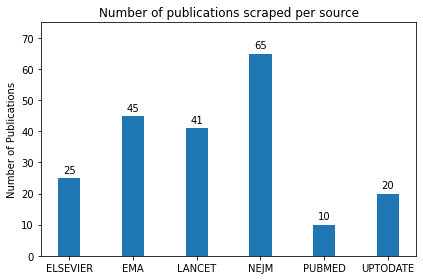

In [141]:
mydata = data.groupby(['Source']).count()
sources = mydata.index
counts = mydata.title_words

x = np.arange(len(sources))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, counts, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Publications')
ax.set_title('Number of publications scraped per source')
ax.set_xticks(x)
ax.set_xticklabels(sources)
ax.set_ylim([0, max(counts)+10])
# ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)

fig.tight_layout()

plt.show()

# Topic modeling with LDA

In [116]:
#https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/

## Input data

In [9]:
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
from pprint import pprint

In [10]:
# NLTK Stop words
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 
                   'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 
                   'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 
                   'may', 'take', 'come',
                   'abstract','structured','introduction','google','scholar','pubmed'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\U060419\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
data_ready = data['abstract_words']
data_ready.append(data['title_words'])
print(data_ready[0:5])
print(data_ready[-5:])

0    ['abstract', 'with', 'multiplication', 'covid-...
1    ['abstract', 'on', 'february', '20', '2020', '...
2    ['structured', 'abstract', 'objective', 'to', ...
3    ['abstract', 'in', 'france', 'epidemic', 'phas...
4    ['abstract', 'the', 'covid-19', 'pandemic', 'n...
Name: abstract_words, dtype: object
201    ['introduction', 'this', 'topic', 'includes', ...
202    ['introduction', 'coronaviruses', 'important',...
203    ['introduction', 'coronaviruses', 'important',...
204    ['introduction', 'this', 'topic', 'provides', ...
205    ['introduction', 'this', 'topic', 'provides', ...
Name: abstract_words, dtype: object


In [12]:
import ast
def process_words(text, stop_words=stop_words):
    """Remove Stopwords"""
    texts_out = []
    for t in text:
        text_out = []
        for word in ast.literal_eval(t):
            if word not in stop_words: 
                text_out.append(word)
        print(text_out)
        texts_out.append(text_out)
    return texts_out

data_ready = process_words(data_ready)  # processed Text Data!
print(data_ready[0:5])
print(data_ready[-5:])

['multiplication', 'covid-19', 'severe', 'acute', 'respiratory', 'syndrome', 'case', 'due', 'sars', 'cov2', 'concern', 'angiotensin-converting', 'enzyme', '1', 'ace1', 'inhibitor', 'acei', 'angiotensin', 'ii', 'type', '1', 'receptor', 'blocker', 'arb', 'emerged', 'ace2', 'angiotensin-converting', 'enzyme', '2', 'enzyme', 'receptor', 'allows', 'sars', 'cov2', 'entry', 'cell', 'fear', 'pre-existing', 'treatment', 'acei', 'arb', 'might', 'increase', 'risk', 'developing', 'severe', 'fatal', 'severe', 'acute', 'respiratory', 'syndrome', 'case', 'covid-19', 'infection', 'present', 'article', 'discus', 'concern', 'ace2', 'membrane-bound', 'enzyme', 'carboxypeptidase', 'contributes', 'inactivation', 'angiotensin', 'ii', 'therefore', 'physiologically', 'counter', 'angiotensin', 'ii', 'effect', 'aceis', 'inhibit', 'ace2', 'although', 'arbs', 'shown', 'upregulate', 'ace2', 'tissue', 'expression', 'experimental', 'animal', 'evidence', 'always', 'consistent', 'human', 'study', 'moreover', 'date', '

['backgroundsince', 'december', '2019', 'wuhan', 'china', 'experienced', 'outbreak', 'coronavirus', 'disease', '2019', 'covid-19', 'caused', 'severe', 'acute', 'respiratory', 'syndrome', 'coronavirus', '2', 'sars-cov-2', 'epidemiological', 'clinical', 'characteristic', 'patient', 'covid-19', 'reported', 'risk', 'factor', 'mortality', 'detailed', 'clinical', 'course', 'illness', 'including', 'viral', 'shedding', 'well', 'describedmethodsin', 'retrospective', 'multicentre', 'cohort', 'study', 'included', 'adult', 'inpatient', '18', 'year', 'old', 'laboratory-confirmed', 'covid-19', 'jinyintan', 'hospital', 'wuhan', 'pulmonary', 'hospital', 'wuhan', 'china', 'discharged', 'died', 'jan', '31', '2020', 'demographic', 'clinical', 'treatment', 'laboratory', 'data', 'including', 'serial', 'sample', 'viral', 'rna', 'detection', 'extracted', 'electronic', 'medical', 'record', 'compared', 'survivor', 'non-survivors', 'used', 'univariable', 'multivariable', 'logistic', 'regression', 'method', 'exp

['coronavirus', 'disease', '2019', 'covid-19', 'spread', 'across', 'world', 'intensive', 'care', 'unit', 'icu', 'community', 'must', 'prepare', 'challenge', 'associated', 'pandemic', 'streamlining', 'workflow', 'rapid', 'diagnosis', 'isolation', 'clinical', 'management', 'infection', 'prevention', 'matter', 'patient', 'covid-19', 'health-care', 'worker', 'patient', 'risk', 'nosocomial', 'transmission', 'management', 'acute', 'respiratory', 'failure', 'haemodynamics', 'key', 'icu', 'practitioner', 'hospital', 'administrator', 'government', 'policy', 'maker', 'must', 'prepare', 'substantial', 'increase', 'critical', 'care', 'bed', 'capacity', 'focus', 'infrastructure', 'supply', 'staff', 'management', 'critical', 'care', 'triage', 'allow', 'rationing', 'scarce', 'icu', 'resource', 'might', 'needed', 'researchers', 'must', 'address', 'unanswered', 'question', 'including', 'role', 'repurposed', 'experimental', 'therapy', 'collaboration', 'local', 'regional', 'national', 'international', 'l

['patients', 'infected', 'virus', 'sars-cov-2', 'clinical', 'disease', 'covid-19', 'often', 'minimally', 'symptomatic', 'asymptomatic', 'severe', 'presentation', 'include', 'pneumonia', 'acute', 'respiratory', 'distress', 'syndromein', 'patient', 'heart', 'affected', 'occur', 'individual', 'without', 'prior', 'cardiovascular', 'diagnosis', 'evidence', 'myocardial', 'injury', 'defined', 'elevated', 'troponin', 'level', 'common', 'among', 'patient', 'hospitalized', 'covid-19', 'putative', 'cause', 'including', 'stress', 'cardiomyopathy', 'hypoxic', 'injury', 'ischemic', 'injury', 'caused', 'cardiac', 'microvascular', 'damage', 'epicardial', 'coronary', 'artery', 'disease', 'systemic', 'inflammatory', 'response', 'syndrome', 'cytokine', 'storm', 'minority', 'patient', 'elevated', 'troponin', 'level', 'present', 'symptom', 'sign', 'suggestive', 'acute', 'coronary', 'syndrome', 'coronavirus', 'disease', '2019', 'covid-19', 'myocardial', 'injury', 'diagnosis', 'acute', 'myocardial', 'infarct

['severe', 'acute', 'respiratory', 'syndrome', 'coronavirus', '2', 'sars-cov-2', 'virus', 'cause', 'coronavirus', 'disease', '2019', 'covid-19', 'information', 'covid-19', 'evolving', 'rapidly', 'interim', 'guidance', 'multiple', 'organization', 'constantly', 'updated', 'expanded', 'topic', 'discus', 'issue', 'related', 'covid-19', 'pregnancy', 'deliveryvirology', 'epidemiology', 'general', 'issue', 'regarding', 'virology', 'geographic', 'distribution', 'route', 'transmission', 'period', 'infectivity', 'immunity', 'sars-cov-2', 'reviewed', 'separately', 'coronavirus', 'disease', '2019', 'covid-19', 'epidemiology', 'virology', 'clinical', 'feature', 'diagnosis', 'prevention', 'vertical', 'transmission', 'addressed', 'vertical', 'transmission', 'prevention', 'pregnant', 'woman', 'follow', 'recommendation', 'nonpregnant', 'person', 'avoiding', 'exposure', 'virus', 'eg', 'social', 'distancing', 'hand', 'hygiene', 'disinfecting', 'surface', 'women', 'epidemiologic', 'history', 'contact', 'm

## Build topic model

In [142]:
#parameters
n_topics = 5 #number of topics

# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=n_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

pprint(lda_model.print_topics())

[(0,
  '0.012*"icu" + 0.012*"myocardial" + 0.012*"cardiac" + 0.008*"et" + '
  '0.007*"2020" + 0.007*"case" + 0.007*"ecg" + 0.006*"coronary" + 0.006*"1" + '
  '0.006*"data"'),
 (1,
  '0.081*"cancer" + 0.027*"kingdom" + 0.014*"surgery" + 0.014*"oncology" + '
  '0.009*"british" + 0.008*"surgeons" + 0.007*"canadian" + 0.007*"tumor" + '
  '0.006*"asco" + 0.006*"statement"'),
 (2,
  '0.042*"covid-19" + 0.038*"united" + 0.033*"society" + 0.029*"states" + '
  '0.017*"guidance" + 0.017*"american" + 0.013*"health" + 0.012*"resources" + '
  '0.010*"child" + 0.010*"association"'),
 (3,
  '0.036*"patient" + 0.033*"covid-19" + 0.018*"disease" + 0.014*"care" + '
  '0.014*"coronavirus" + 0.010*"2019" + 0.009*"infection" + 0.008*"clinical" + '
  '0.008*"risk" + 0.007*"management"'),
 (4,
  '0.038*"anesthesia" + 0.034*"machine" + 0.025*"anesthetic" + '
  '0.019*"ventilator" + 0.018*"dialysis" + 0.016*"inhalation" + 0.013*"aki" + '
  '0.012*"millisecond" + 0.010*"circuit" + 0.009*"sedation"')]


In [143]:
# https://github.com/raffg/harry_potter_nlp/blob/master/LDA.ipynb
# Compute Coherence Score
# Topic Coherence measures score a single topic by measuring the degree of semantic similarity between high scoring words in the topic.
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_ready, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print ('Coherence Score: ', coherence_lda)

Coherence Score:  0.4605829099087536


def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print('Calculating {}-topic model'.format(num_topics))
        # model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

#### Can take a long time to run.
limit=50; start=2; step=1;
model_list, coherence_values = compute_coherence_values(dictionary=id2word,
                                                        corpus=corpus,
                                                        texts=data_ready,
                                                        start=start,
                                                        limit=limit,
                                                        step=step)

#### Show graph
x = range(start, limit, step)
plt.figure(figsize=(15, 10))
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylim(0,0.5)
plt.ylabel("Coherence score")
plt.show()

i = 0
for nb in range(start, limit, step):
    print(str(nb)+' topics: '+str(round(coherence_values[i],4))+' coherence.\n')
    i += 1

## Visualize

In [144]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.4894,"covid-19, united, society, states, guidance, american, health, resources, child, association","[multiplication, covid-19, severe, acute, respiratory, syndrome, case, due, sars, cov2, concern,..."
1,1,3.0,0.9006,"patient, covid-19, disease, care, coronavirus, 2019, infection, clinical, risk, management","[february, 20, 2020, man, living, north, italy, admitted, emergency, room, atypical, pneumonia, ..."
2,2,3.0,0.7754,"patient, covid-19, disease, care, coronavirus, 2019, infection, clinical, risk, management","[objective, summarize, current, understanding, effect, novel, prior, coronaviruses, human, repro..."
3,3,2.0,0.5114,"covid-19, united, society, states, guidance, american, health, resources, child, association","[france, epidemic, phase, covid-19, caused, severe, acute, respiratory, syndrome, coronavirus, 2..."
4,4,2.0,0.5382,"covid-19, united, society, states, guidance, american, health, resources, child, association","[covid-19, pandemic, necessitates, aggressive, infection, mitigation, strategy, reduce, risk, pa..."
5,5,2.0,0.5382,"covid-19, united, society, states, guidance, american, health, resources, child, association","[covid-19, pandemic, necessitates, aggressive, infection, mitigation, strategy, reduce, risk, pa..."
6,6,0.0,0.5132,"icu, myocardial, cardiac, et, 2020, case, ecg, coronary, 1, data","[background, data, available, rate, characteristic, thromboembolic, complication, hospitalized, ..."
7,7,3.0,0.9830,"patient, covid-19, disease, care, coronavirus, 2019, infection, clinical, risk, management","[severe, acute, respiratory, syndrome, coronavirus, 2, sars-cov-2, known, coronavirus, disease, ..."
8,8,0.0,0.5982,"icu, myocardial, cardiac, et, 2020, case, ecg, coronary, 1, data",[n]
9,9,3.0,0.9844,"patient, covid-19, disease, care, coronavirus, 2019, infection, clinical, risk, management","[summary, according, previous, report, diabetes, seems, associated, serious, clinical, event, du..."


In [145]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
display(sent_topics_sorteddf_mallet.head(10))

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.7828,"icu, myocardial, cardiac, et, 2020, case, ecg, coronary, 1, data","[sequential, schlieren, image, cough, shown, video, recorded, 3000, frame, per, second, maximum,..."
1,1.0,0.5998,"cancer, kingdom, surgery, oncology, british, surgeons, canadian, tumor, asco, statement",[bmj]
2,2.0,0.9766,"covid-19, united, society, states, guidance, american, health, resources, child, association","[ema, announced, participate, observer, european, commission, advisory, panel, covid-19, chaired..."
3,3.0,0.9844,"patient, covid-19, disease, care, coronavirus, 2019, infection, clinical, risk, management","[summary, according, previous, report, diabetes, seems, associated, serious, clinical, event, du..."
4,4.0,0.5999,"anesthesia, machine, anesthetic, ventilator, dialysis, inhalation, aki, millisecond, circuit, se...",[cmaj]


In [17]:
df_dominant_topic = df_dominant_topic.merge(data, how='left', left_index=True, right_index=True) #merge with abstract on index

for topic in range(n_topics):
    wp = lda_model.show_topic(topic)
    topic_keywords = ", ".join([word for word, prop in wp])
    print('Topic '+str(topic)+':\n')
    print('Keywords in topic: '+topic_keywords)
    display(df_dominant_topic.loc[df_dominant_topic['Dominant_Topic']==topic,:].sort_values(by='Topic_Perc_Contrib', ascending=False).head(5))

Topic 0:

Keywords in topic: icu, myocardial, cardiac, et, 2020, case, ecg, coronary, 1, data


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,ID,DOI,Type,PublishedDate,Source,title_words,abstract_sentences,abstract_words
174,174,0.0,0.7828,"icu, myocardial, cardiac, et, 2020, case, ecg, coronary, 1, data","[sequential, schlieren, image, cough, shown, video, recorded, 3000, frame, per, second, maximum,...",DOI:https://www.nejm.org10.1056/NEJMicm072576,https://www.nejm.org10.1056/NEJMicm072576,IMAGES IN CLINICAL MEDICINE,NaN,NEJM,"['coughing', 'aerosols']","['Sequential schlieren image cough , shown video , recorded 3000 frame per second .', 'A maximum...","['sequential', 'schlieren', 'image', 'cough', 'shown', 'video', 'recorded', '3000', 'frame', 'pe..."
85,85,0.0,0.6799,"icu, myocardial, cardiac, et, 2020, case, ecg, coronary, 1, data","[studies, shown, patient, coronavirus, disease, 2019, covid-19, acute, hypoxaemic, respiratory, ...",DOI:10.1016/S1473-3099(20)30367-4,10.1016/S1473-3099(20)30367-4,Correspondence,NaN,LANCET,"['hypoxaemia', 'related', 'covid-19', 'vascular', 'perfusion', 'abnormality', 'dual-energy', 'ct']",['Studies shown patient coronavirus disease 2019 ( COVID-19 ) acute hypoxaemic respiratory failu...,"['studies', 'shown', 'patient', 'coronavirus', 'disease', '2019', 'covid-19', 'acute', 'hypoxaem..."
93,93,0.0,0.6530,"icu, myocardial, cardiac, et, 2020, case, ecg, coronary, 1, data","[backgroundsince, december, 2019, wuhan, china, experienced, outbreak, coronavirus, disease, 201...",DOI:10.1016/S0140-6736(20)30566-3,10.1016/S0140-6736(20)30566-3,Articles,NaN,LANCET,"['clinical', 'course', 'risk', 'factor', 'mortality', 'adult', 'inpatient', 'covid-19', 'wuhan',...","['BackgroundSince December , 2019 , Wuhan , China , experienced outbreak coronavirus disease 201...","['backgroundsince', 'december', '2019', 'wuhan', 'china', 'experienced', 'outbreak', 'coronaviru..."
23,23,0.0,0.6438,"icu, myocardial, cardiac, et, 2020, case, ecg, coronary, 1, data","[study, aim, analyze, correlation, weather, covid-19, pandemic, jakarta, indonesia, study, emplo...",DOI:10.1016/j.scitotenv.2020.138436,10.1016/j.scitotenv.2020.138436,Science of The Total Environment,2020-04-04 00:00:00+00:00,ELSEVIER,"['correlation', 'weather', 'covid-19', 'pandemic', 'jakarta', 'indonesia']","['Abstract This study aim analyze correlation weather covid-19 pandemic Jakarta Indonesia .', 'T...","['abstract', 'this', 'study', 'aim', 'analyze', 'correlation', 'weather', 'covid-19', 'pandemic'..."
70,70,0.0,0.6357,"icu, myocardial, cardiac, et, 2020, case, ecg, coronary, 1, data","[coronavirus, disease, 2019, covid-19, caused, severe, acute, respiratory, syndrome, coronavirus...",DOI:10.1016/S0140-6736(20)31024-2,10.1016/S0140-6736(20)31024-2,Correspondence,NaN,LANCET,"['obesity', 'could', 'shift', 'severe', 'covid-19', 'disease', 'younger', 'age']",['Coronavirus disease 2019 ( COVID-19 ) caused severe acute respiratory syndrome coronavirus 2 f...,"['coronavirus', 'disease', '2019', 'covid-19', 'caused', 'severe', 'acute', 'respiratory', 'synd..."


Topic 1:

Keywords in topic: cancer, kingdom, surgery, oncology, british, surgeons, canadian, tumor, asco, statement


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,ID,DOI,Type,PublishedDate,Source,title_words,abstract_sentences,abstract_words
180,180,1.0,0.5998,"cancer, kingdom, surgery, oncology, british, surgeons, canadian, tumor, asco, statement",[bmj],DOI:10.1136/bmj.m1793,10.1136/bmj.m1793,BMJ,2020-05-03 00:00:00,PUBMED,"['covid-19', 'nhs', 'outline', 'service', 'prioritised', 'restart', 'next', 'six', 'week']",['BMJ'],['bmj']
184,184,1.0,0.5998,"cancer, kingdom, surgery, oncology, british, surgeons, canadian, tumor, asco, statement",[bmj],DOI:10.1136/bmj.m1725,10.1136/bmj.m1725,BMJ,2020-05-03 00:00:00,PUBMED,"['covid-19', 'doctor', 'must', 'take', 'control', 'wellbeing']",['BMJ'],['bmj']
177,177,1.0,0.5995,"cancer, kingdom, surgery, oncology, british, surgeons, canadian, tumor, asco, statement",[neoreviews],DOI:10.1542/neo.21-5-e293,10.1542/neo.21-5-e293,Neoreviews,2020-05-03 00:00:00,PUBMED,"['neonatal', 'management', 'during', 'coronavirus', 'disease', 'covid-19', 'outbreak', 'the', 'c...",['Neoreviews'],['neoreviews']
135,135,1.0,0.5381,"cancer, kingdom, surgery, oncology, british, surgeons, canadian, tumor, asco, statement","[harvey, fineberg, call, forceful, focused, campaign, eradicate, covid-19, outline, six, step, m...",DOI:10.1056/NEJMe2007263,10.1056/NEJMe2007263,Editorial,2020-04-23 00:00:00,NEJM,"['ten', 'weeks', 'crush', 'curve']","['Harvey Fineberg call forceful , focused campaign eradicate Covid-19 outline six step mobilize ...","['harvey', 'fineberg', 'call', 'forceful', 'focused', 'campaign', 'eradicate', 'covid-19', 'outl..."
102,102,1.0,0.3687,"cancer, kingdom, surgery, oncology, british, surgeons, canadian, tumor, asco, statement","[view, large, image, copyright, 2014, sabin, vaccine, instituteview, large, image, copyright, 20...",DOI:10.1016/S0140-6736(14)61202-2,10.1016/S0140-6736(14)61202-2,Obituary,NaN,LANCET,"['ciro', 'de', 'quadros']",['View Large Image Copyright © 2014 Sabin Vaccine InstituteView Large Image Copyright © 2014 Sab...,"['view', 'large', 'image', 'copyright', '2014', 'sabin', 'vaccine', 'instituteview', 'large', 'i..."


Topic 2:

Keywords in topic: covid-19, united, society, states, guidance, american, health, resources, child, association


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,ID,DOI,Type,PublishedDate,Source,title_words,abstract_sentences,abstract_words
64,64,2.0,0.9766,"covid-19, united, society, states, guidance, american, health, resources, child, association","[ema, announced, participate, observer, european, commission, advisory, panel, covid-19, chaired...",URL:emas-governance-during-covid-19-pandemic,NaN,Update,2020-03-18 00:00:00,EMA,"['ema', 'governance', 'covid-19', 'pandemic']","[""EMA announced participate observer European Commission 's advisory panel COVID-19 ."", 'Chaired...","['ema', 'announced', 'participate', 'observer', 'european', 'commission', 's', 'advisory', 'pane..."
68,68,2.0,0.9723,"covid-19, united, society, states, guidance, american, health, resources, child, association","[european, medicine, regulatory, network, taken, measure, monitor, potential, impact, outbreak, ...",URL:availability-medicines-during-covid-19-pandemic,NaN,Update,2020-03-10 00:00:00,EMA,"['availability', 'medicine', 'covid-19', 'pandemic']",['The European medicine regulatory network taken measure monitor potential impact outbreak COVID...,"['the', 'european', 'medicine', 'regulatory', 'network', 'taken', 'measure', 'monitor', 'potenti..."
25,25,2.0,0.9576,"covid-19, united, society, states, guidance, american, health, resources, child, association","[ema, european, commission, national, competent, authority, published, question, answer, regulat...",URL:guidance-medicine-developers-companies-covid-19,NaN,Update,2020-05-04 00:00:00,EMA,"['guidance', 'medicine', 'developer', 'company', 'covid-19']","['EMA , European Commission national competent authority published question answer regulatory ex...","['ema', 'european', 'commission', 'national', 'competent', 'authority', 'published', 'question',..."
51,51,2.0,0.9542,"covid-19, united, society, states, guidance, american, health, resources, child, association","[ema, started, issuing, certificate, signed, authenticated, electronically, place, paper, certif...",URL:certification-medicinal-products,NaN,Update,2020-03-30 00:00:00,EMA,"['certification', 'medicinal', 'product']",['EMA started issuing certificate signed authenticated electronically place paper certificate .'...,"['ema', 'started', 'issuing', 'certificate', 'signed', 'authenticated', 'electronically', 'place..."
45,45,2.0,0.9491,"covid-19, united, society, states, guidance, american, health, resources, child, association","[ema, announced, essential, work, combat, covid-19, pandemic, continue, agency, easter, break, 9...",URL:emas-governance-during-covid-19-pandemic,NaN,Update,2020-04-07 00:00:00,EMA,"['ema', 'governance', 'covid-19', 'pandemic']",['EMA announced essential work combat COVID-19 pandemic would continue Agency ’ Easter break 9 1...,"['ema', 'announced', 'essential', 'work', 'combat', 'covid-19', 'pandemic', 'would', 'continue',..."


Topic 3:

Keywords in topic: patient, covid-19, disease, care, coronavirus, 2019, infection, clinical, risk, management


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,ID,DOI,Type,PublishedDate,Source,title_words,abstract_sentences,abstract_words
9,9,3.0,0.9844,"patient, covid-19, disease, care, coronavirus, 2019, infection, clinical, risk, management","[summary, according, previous, report, diabetes, seems, associated, serious, clinical, event, du...",DOI:10.1016/j.therap.2020.04.004,10.1016/j.therap.2020.04.004,Therapies,2020-04-23 00:00:00+00:00,ELSEVIER,['therapcovid-19'],"['Summary According previous report , diabetes seems associated serious clinical event due COVID...","['summary', 'according', 'previous', 'report', 'diabetes', 'seems', 'associated', 'serious', 'cl..."
7,7,3.0,0.9830,"patient, covid-19, disease, care, coronavirus, 2019, infection, clinical, risk, management","[severe, acute, respiratory, syndrome, coronavirus, 2, sars-cov-2, known, coronavirus, disease, ...",DOI:10.1016/j.ekir.2020.04.001,10.1016/j.ekir.2020.04.001,Kidney International Reports,2020-04-04 00:00:00+00:00,ELSEVIER,"['management', 'patients', 'dialysis', 'with', 'kidney', 'transplantation', 'during', 'sars-cov-...","['The severe acute respiratory syndrome coronavirus 2 ( SARS-CoV-2 ) , also known coronavirus di...","['the', 'severe', 'acute', 'respiratory', 'syndrome', 'coronavirus', '2', 'sars-cov-2', 'also', ..."
164,164,3.0,0.9755,"patient, covid-19, disease, care, coronavirus, 2019, infection, clinical, risk, management","[february, 28, 2020, public, health, official, seattle, area, informed, covid-19, infection, lon...",DOI:10.1056/NEJMoa2005412,10.1056/NEJMoa2005412,Original Article,2020-03-27 00:00:00,NEJM,"['covid-19', 'outbreak', 'long-term', 'care', 'facility']","['On February 28 , 2020 , public health official Seattle area informed Covid-19 infection long-t...","['on', 'february', '28', '2020', 'public', 'health', 'official', 'seattle', 'area', 'informed', ..."
162,162,3.0,0.9755,"patient, covid-19, disease, care, coronavirus, 2019, infection, clinical, risk, management","[covid-19, pandemic, already, stressed, health, care, system, throughout, world, requiring, rati...",DOI:10.1056/NEJMsb2005114,10.1056/NEJMsb2005114,Sounding Board,2020-03-23 00:00:00,NEJM,"['allocating', 'scarce', 'medical', 'resources', 'covid-19']","['The Covid-19 pandemic already stressed health care system throughout world , requiring rationi...","['the', 'covid-19', 'pandemic', 'already', 'stressed', 'health', 'care', 'system', 'throughout',..."
141,141,3.0,0.9732,"patient, covid-19, disease, care, coronavirus, 2019, infection, clinical, risk, management","[author, describe, patient, new, york, city, known, immune-mediated, inflammatory, disease, covi...",DOI:10.1056/NEJMc2009567,10.1056/NEJMc2009567,Correspondence,2020-04-29 00:00:00,NEJM,"['covid-19', 'immune-mediated', 'inflammatory', 'diseases']",['The author describe patient New York City known immune-mediated inflammatory disease Covid-19 ...,"['the', 'author', 'describe', 'patient', 'new', 'york', 'city', 'known', 'immune-mediated', 'inf..."


Topic 4:

Keywords in topic: anesthesia, machine, anesthetic, ventilator, dialysis, inhalation, aki, millisecond, circuit, sedation


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,ID,DOI,Type,PublishedDate,Source,title_words,abstract_sentences,abstract_words
176,176,4.0,0.5999,"anesthesia, machine, anesthetic, ventilator, dialysis, inhalation, aki, millisecond, circuit, se...",[cmaj],DOI:10.1503/cmaj.200685,10.1503/cmaj.200685,CMAJ,2020-05-03 00:00:00,PUBMED,"['coagulopathy', 'associated', 'covid-19']",['CMAJ'],['cmaj']
182,182,4.0,0.5999,"anesthesia, machine, anesthetic, ventilator, dialysis, inhalation, aki, millisecond, circuit, se...",[nature],DOI:10.1038/d41586-020-01324-6,10.1038/d41586-020-01324-6,Nature,2020-05-03 00:00:00,PUBMED,"['coronavirus', 'context', 'sciteai', 'track', 'positive', 'negative', 'citation', 'covid-19', '...",['Nature'],['nature']
183,183,4.0,0.5999,"anesthesia, machine, anesthetic, ventilator, dialysis, inhalation, aki, millisecond, circuit, se...",[cmaj],DOI:10.1503/cmaj.200650,10.1503/cmaj.200650,CMAJ,2020-05-03 00:00:00,PUBMED,"['tracheal', 'intubation', 'patient', 'covid-19']",['CMAJ'],['cmaj']
12,12,4.0,0.5346,"anesthesia, machine, anesthetic, ventilator, dialysis, inhalation, aki, millisecond, circuit, se...","[rsum, le, de, cet, article, est, de, dtailler, le, mesures, prises, dans, le, tablissements, pu...",DOI:10.1016/j.jchirv.2020.04.009,10.1016/j.jchirv.2020.04.009,Journal de Chirurgie Viscérale,2020-04-18 00:00:00+00:00,ELSEVIER,"['gestion', 'de', 'l', 'pidmie', 'de', 'la', 'covid-19', 'par', 'le', 'tablissements', 'public',...",['Résumé Le de cet article est de détailler le mesures prises dans le établissements public pour...,"['rsum', 'le', 'de', 'cet', 'article', 'est', 'de', 'dtailler', 'le', 'mesures', 'prises', 'dans..."
122,122,4.0,0.4274,"anesthesia, machine, anesthetic, ventilator, dialysis, inhalation, aki, millisecond, circuit, se...","[burnout, problem, solved, without, addressing, issue, autonomy, competence, relatedness, covid-...",DOI:10.1056/NEJMp2003149,10.1056/NEJMp2003149,Perspective,2020-05-01 00:00:00,NEJM,"['physician', 'burnout', 'interrupted']","['The burnout problem ’ solved without addressing issue autonomy , competence , relatedness .', ...","['the', 'burnout', 'problem', 'solved', 'without', 'addressing', 'issue', 'autonomy', 'competenc..."


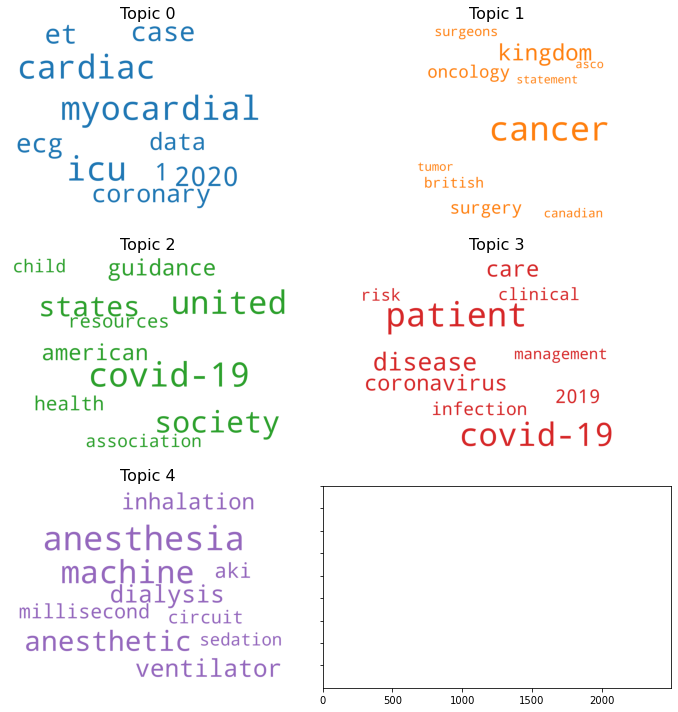

In [18]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()[0:-1]):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

- Weight: the importance of each keyword in the topic

- Word frequency: how often have the words appeared in a publication

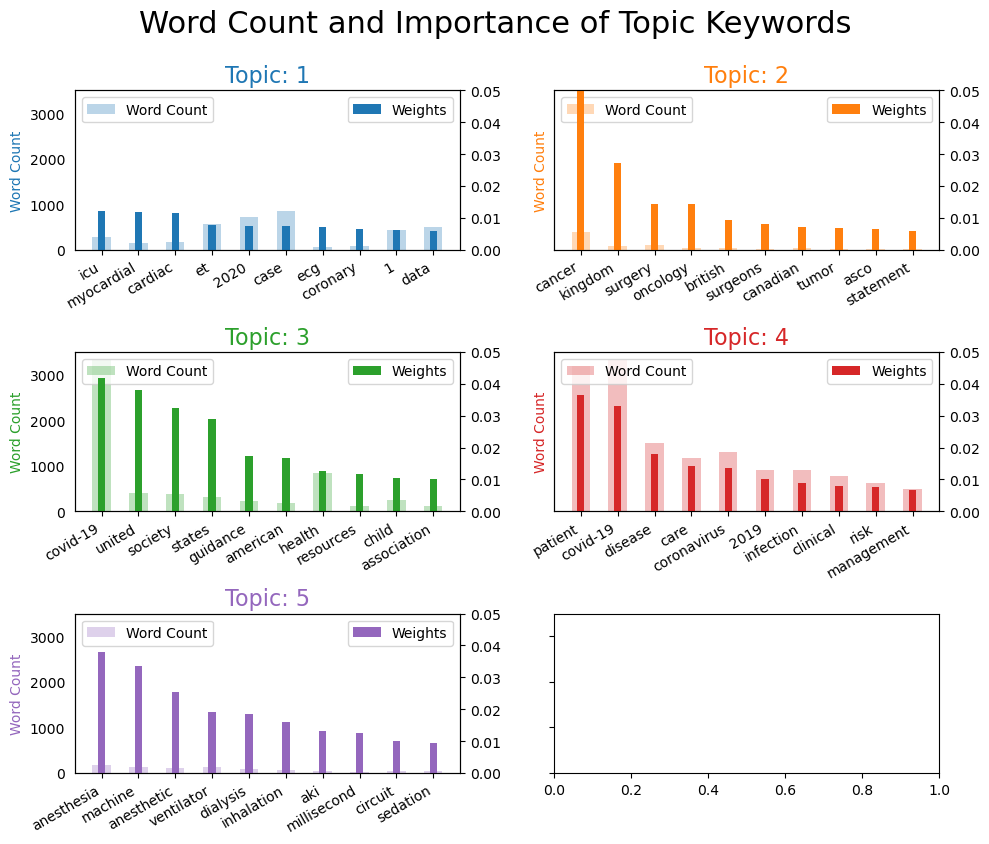

In [19]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(3, 2, figsize=(10,8), sharey=True, dpi=100)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()[0:-1]):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.050); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i+1), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [20]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.299450 -0.041044       1        1  55.575104
0     -0.075362 -0.221882       2        1  25.211494
2     -0.055628  0.323283       3        1  12.813894
4      0.179948 -0.057985       4        1   3.525040
1      0.250492 -0.002372       5        1   2.874476, topic_info=           Term         Freq        Total Category  logprob  loglift
34     covid-19  3859.000000  3859.000000  Default  30.0000  30.0000
166      united   808.000000   808.000000  Default  29.0000  29.0000
1041     cancer   468.000000   468.000000  Default  28.0000  28.0000
88      society   677.000000   677.000000  Default  27.0000  27.0000
160      states   617.000000   617.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
533   institute    23.190317    33.445480   Topic5  -5.3047   3.1831
2371    service    24.818989    49.594227   Topic5  -5.2368   2.8570
1058   thoracic    19.365610    31.432537   Topic5  -5.4850   3.0650
2835  australia    24.104935   102.081047   Topic5  -5.2660   2.1059
3226        nhs    15.615970    38.626381   Topic5  -5.7002   2.6437

[269 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         1  0.341885        1
0         2  0.657471        1
410       1  0.320499       10
410       2  0.681625       10
589       1  0.963937     2019
...     ...       ...      ...
1152      1  0.996154  without
266       1  0.997337    woman
989       1  0.178998    wuhan
989       2  0.820405    wuhan
3563      2  1.000371        x

[320 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 3, 5, 2])

# Count frequency of terms

In [146]:
from collections import Counter
from datetime import datetime

In [147]:
data_ready_with_publicationDate = data[['PublishedDate','abstract_words']]
data_ready_with_publicationDate.append(data[['PublishedDate','title_words']])
print('Number of missing values in publishedDate and/or abstract:\n'+str(data_ready_with_publicationDate.isna().sum()))
data_ready_with_publicationDate.dropna(inplace=True)
print(data_ready_with_publicationDate[0:5])
print(data_ready_with_publicationDate[-5:])

Number of missing values in publishedDate and/or abstract:
PublishedDate     46
abstract_words     0
dtype: int64
               PublishedDate  \
0  2020-04-21 00:00:00+00:00   
1  2020-04-23 00:00:00+00:00   
2  2020-04-16 00:00:00+00:00   
3  2020-04-20 00:00:00+00:00   
4  2020-04-27 00:00:00+00:00   

                                                                                        abstract_words  
0  ['abstract', 'with', 'multiplication', 'covid-19', 'severe', 'acute', 'respiratory', 'syndrome',...  
1  ['abstract', 'on', 'february', '20', '2020', 'man', 'living', 'north', 'italy', 'admitted', 'eme...  
2  ['structured', 'abstract', 'objective', 'to', 'summarize', 'current', 'understanding', 'effect',...  
3  ['abstract', 'in', 'france', 'epidemic', 'phase', 'covid-19', 'caused', 'severe', 'acute', 'resp...  
4  ['abstract', 'the', 'covid-19', 'pandemic', 'necessitates', 'aggressive', 'infection', 'mitigati...  
           PublishedDate  \
201  2020-04-30 02:00:00   
202  20

c:\python_3.7.4\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [148]:
def try_parsing_date(text):
    for fmt in ('%Y-%m-%d %H:%M:%S', '%Y-%m-%d %H:%M:%S+00:00', '%Y-%m-%d'):
        try:
            return datetime.strptime(text, fmt).date()
        except ValueError:
            pass
    raise ValueError('no valid date format found')

data_ready_with_publicationDate['PublishedDate'] = data_ready_with_publicationDate['PublishedDate'].apply(
    lambda x: try_parsing_date(x))

c:\python_3.7.4\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [149]:
data_ready_with_publicationDate['week'] = data_ready_with_publicationDate['PublishedDate'].apply(
    lambda x: x.isocalendar()[1])
data_ready_with_publicationDate.head()

c:\python_3.7.4\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PublishedDate,abstract_words,week
0,2020-04-21,"['abstract', 'with', 'multiplication', 'covid-19', 'severe', 'acute', 'respiratory', 'syndrome',...",17
1,2020-04-23,"['abstract', 'on', 'february', '20', '2020', 'man', 'living', 'north', 'italy', 'admitted', 'eme...",17
2,2020-04-16,"['structured', 'abstract', 'objective', 'to', 'summarize', 'current', 'understanding', 'effect',...",16
3,2020-04-20,"['abstract', 'in', 'france', 'epidemic', 'phase', 'covid-19', 'caused', 'severe', 'acute', 'resp...",17
4,2020-04-27,"['abstract', 'the', 'covid-19', 'pandemic', 'necessitates', 'aggressive', 'infection', 'mitigati...",18


In [150]:
weeks = range(data_ready_with_publicationDate.week.min(),data_ready_with_publicationDate.week.max()+1)
start = data_ready_with_publicationDate.week.min()
print('Range from week '+str(start)+' to week '+str(data_ready_with_publicationDate.week.max()))

Range from week 6 to week 19


In [158]:
import pickle
import os
    
for wk in weeks:
    # Create target Directory if don't exist
    path = 'Data/wk_'+str(wk)
    if not os.path.exists(path):
        os.mkdir(path)
        print("Directory " , path ,  " Created ")
    pathname = 'Data/wk_'+str(wk)+'/entity_counter' 
    #Count entities per week
    entities = []
    for doc in data_ready_with_publicationDate.loc[data_ready_with_publicationDate.week==wk,'abstract_words']:
        for entity in ast.literal_eval(doc):
            entities.append(entity)
    with open(pathname, 'wb') as outputfile:
        pickle.dump(Counter(entities), outputfile)

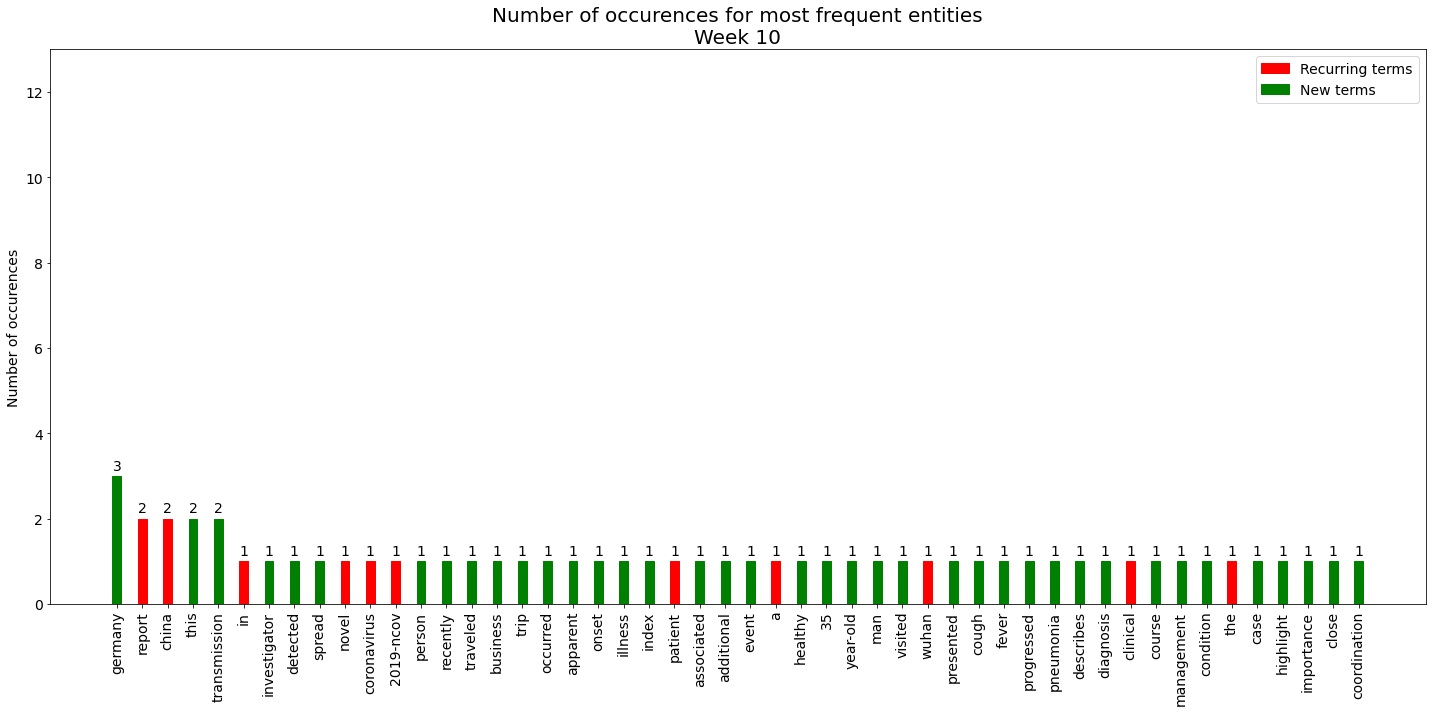

In [155]:
import matplotlib.patches as mpatches

wk = 10

pathname = 'Data/wk_'+str(wk)+'/entity_counter' 
with open(pathname, 'rb') as inputfile:
    entity_counter = pickle.load(inputfile)
freq_entities = entity_counter.most_common(50)

if len(freq_entities)==0:
    print('No data for this week')
    
recurring_entities = []
for w in range(start,wk):
    pathname = 'Data/wk_'+str(w)+'/entity_counter'
    with open(pathname, 'rb') as inputfile:
        entity_counter_temp = pickle.load(inputfile)
    freq_entities_temp = entity_counter_temp.most_common(50)
    if len(freq_entities_temp)==0:
        continue
    for term in list(zip(*freq_entities))[0]:
        if term in list(zip(*freq_entities_temp))[0]:
            recurring_entities.append(term)

# save the names and their respective scores separately
# reverse the tuples to go from most frequent to least frequent 
terms = list(zip(*freq_entities))[0]
counts = list(zip(*freq_entities))[1]

x = np.arange(len(terms))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(x, counts, width)

for i in range(0,len(terms)):
    if terms[i] in recurring_entities:
        rects1[i].set_color('r')
    else:
        rects1[i].set_color('g')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of occurences', fontsize=14)
ax.set_title('Number of occurences for most frequent entities\nWeek '+str(wk), fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(terms)
ax.set_ylim([0, max(counts)+10])
ax.tick_params(labelsize=14)
plt.xticks(rotation=90) 

red_patch = mpatches.Patch(color='red', label='Recurring terms')
green_patch = mpatches.Patch(color='green', label='New terms')
plt.legend(handles=[red_patch,green_patch],fontsize=14)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=14)


autolabel(rects1)

fig.tight_layout()

plt.show()

In [195]:
#load keywords
file = open("Data/keywords_ipvu.txt","r")
keywords = file.read().strip()
keywords = keywords.split(',')
print(keywords)
print(type(keywords))
file.close()

['certolizumab', 'pegol', 'brodalumab', 'kyntheum', 'ixekizumab', 'taltz', 'secukinumab', 'cosentyx', 'ustekinumab', 'stelara', 'guselkumab', 'tremfya', 'risankizumab', 'skyrizi', 'tildrakizumab', 'ilumetri', 'tocilizumab', 'roactemra', 'tofacitinib', 'rituximab', 'olimumab', 'xeljanz', 'mabthera', 'simponi', 'baracitinib\t', 'adalimumab', 'baricitinib', 'olumiant', 'humira', 'olumiant', 'apremilast', 'etanercept', 'upadacitinib', 'otezla', 'enbrel', 'rinvoq', 'abatacept', 'infliximab', 'certolizumab pegol', 'orencia', 'remicade', 'cimzia', 'methotrexate', 'mycophenolate mofetil', 'azathioprine', 'cyclophosphamide', 'chloroquine', 'tacrolimus', 'ciclosporin', 'global health emergency', 'hydroxychloroquine', 'leflunomide', 'infection', 'sulfasalazine', 'SARS-CoV-2', 'in vitro', 'safety', 'psoriasis']
<class 'list'>


In [211]:
overview = data_ready_with_publicationDate
for keyword in keywords:
    overview[keyword] = overview['abstract_words'].apply(lambda x: x.count(keyword) if (keyword in x)
                                                         else 0)
    
overview_grouped = overview.groupby(['PublishedDate'],as_index=True)[[
    'infection', 'SARS-CoV-2', 'in vitro', 'safety', 'psoriasis','cimzia']].sum()
overview_grouped.sort_values(by='PublishedDate', inplace=True)
overview_grouped = overview_grouped.T
print(overview_grouped)

PublishedDate  2020-02-04  2020-02-20  2020-02-28  2020-03-05  2020-03-10  \
infection               0           0           0           0           0   
SARS-CoV-2              0           0           0           0           0   
in vitro                0           0           0           0           0   
safety                  0           0           0           0           0   
psoriasis               0           0           0           0           0   
cimzia                  0           0           0           0           0   

PublishedDate  2020-03-11  2020-03-13  2020-03-17  2020-03-18  2020-03-19  \
infection               0           0           0           0           0   
SARS-CoV-2              0           0           0           0           0   
in vitro                0           0           0           0           0   
safety                  0           0           0           1           0   
psoriasis               0           0           0           0           0  

c:\python_3.7.4\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


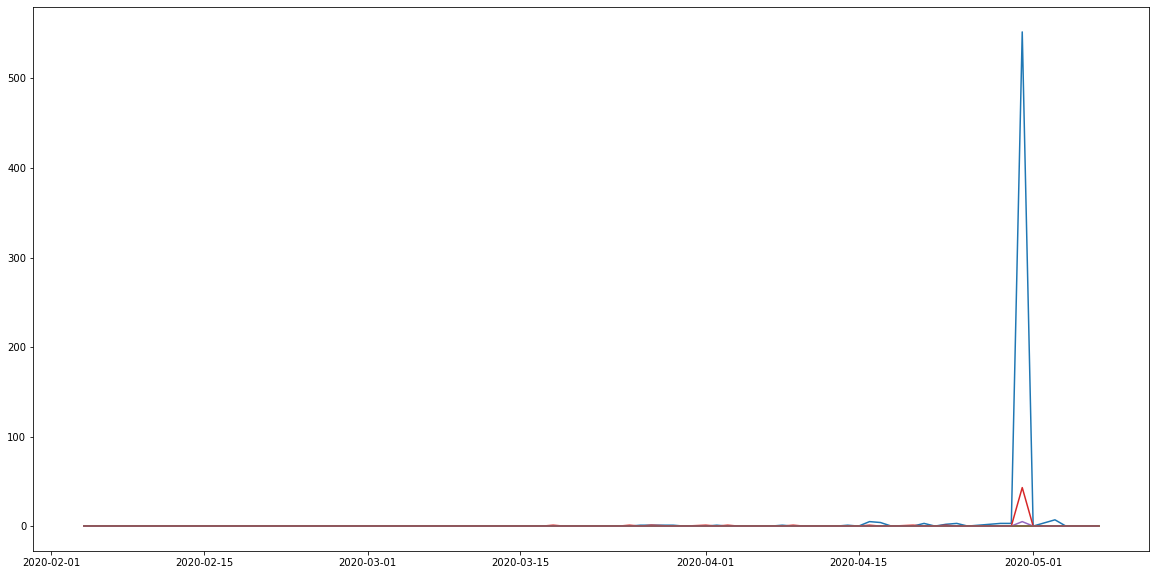

In [215]:
fig, ax = plt.subplots(figsize=(20,10))
for index, row in overview_grouped.iterrows():
    plt.plot(overview_grouped.columns, row)
    plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

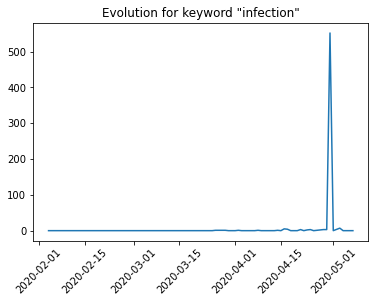

In [226]:
plt.plot(overview_grouped.columns,overview_grouped[overview_grouped.index=='infection'].T)
plt.xticks(rotation=45)
plt.title('Evolution for keyword "infection"')
plt.legend